# 1. Install Dependencies and Setup

In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [ ]:
!pip list

In [4]:
import tensorflow as tf
import os

In [5]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [156]:
import cv2
import imghdr

In [157]:
data_dir = 'asset'

In [158]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [159]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list asset/algebra formula/Image_72.png
Image not in ext list asset/algebra formula/Image_20.gif
Image not in ext list asset/algebra formula/Image_55.gif
Image not in ext list asset/algebra formula/Image_100.gif
Image not in ext list asset/algebra formula/Image_25.gif
Image not in ext list asset/algebra formula/Image_51.gif
Image not in ext list asset/algebra formula/Image_40.gif
Image not in ext list asset/algebra formula/Image_15.webp
Image not in ext list asset/algebra formula/Image_18.gif
Image not in ext list asset/trigonometry formula/Image_40.png


# 3. Load Data

In [160]:
import numpy as np
from matplotlib import pyplot as plt

In [162]:
data = tf.keras.utils.image_dataset_from_directory('asset')

Found 190 files belonging to 2 classes.


In [163]:
data_iterator = data.as_numpy_iterator()

In [164]:
batch = data_iterator.next()

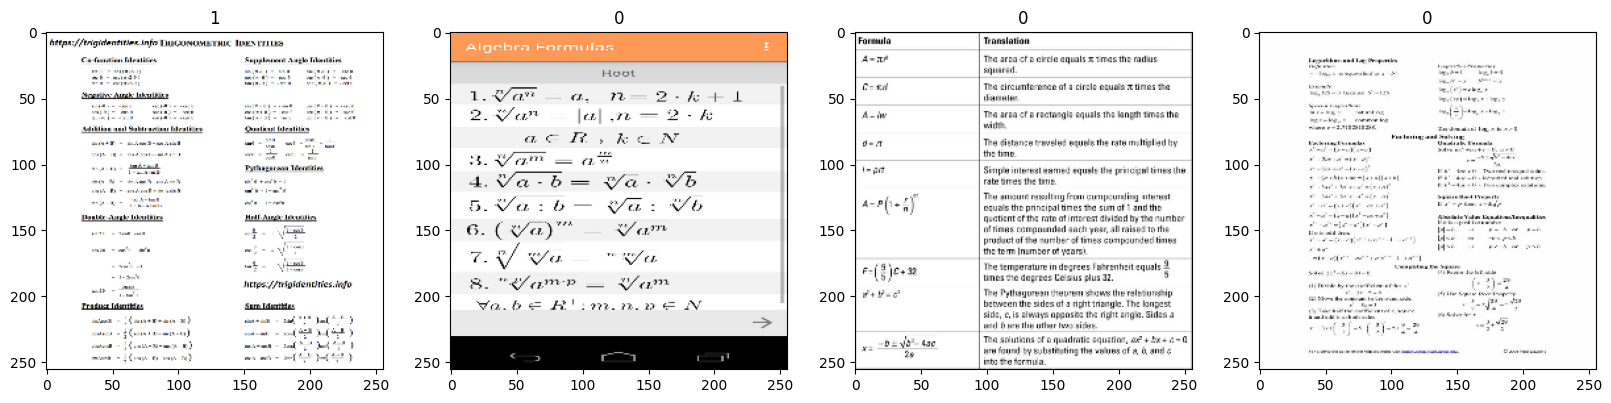

In [165]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [166]:
data = data.map(lambda x,y: (x/255, y))

In [167]:
data.as_numpy_iterator().next()

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

# 5. Split Data

In [168]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [169]:
train_size

4

In [170]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [171]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [172]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [173]:
model = Sequential()

In [174]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [175]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [176]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 30, 30, 16)       

# 7. Train

In [177]:
logdir='logs'

In [178]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [179]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 9s 2s/step - loss: 1.2975 - accuracy: 0.5234 - val_loss: 0.9701 - val_accuracy: 0.2812
Epoch 2/20
4/4 [==============================] - 8s 2s/step - loss: 0.7651 - accuracy: 0.4453 - val_loss: 0.6876 - val_accuracy: 0.5625
Epoch 3/20
4/4 [==============================] - 8s 2s/step - loss: 0.6871 - accuracy: 0.5391 - val_loss: 0.6869 - val_accuracy: 0.5000
Epoch 4/20
4/4 [==============================] - 8s 2s/step - loss: 0.6868 - accuracy: 0.4609 - val_loss: 0.6894 - val_accuracy: 0.5312
Epoch 5/20
4/4 [==============================] - 8s 2s/step - loss: 0.6801 - accuracy: 0.5156 - val_loss: 0.6513 - val_accuracy: 0.6562
Epoch 6/20
4/4 [==============================] - 7s 2s/step - loss: 0.6678 - accuracy: 0.4922 - val_loss: 0.6643 - val_accuracy: 0.7500
Epoch 7/20
4/4 [==============================] - 8s 2s/step - loss: 0.6350 - accuracy: 0.6484 - val_loss: 0.6700 - val_accuracy: 0.5312
Epoch 8/20
4/4 [=========================

# 8. Plot Performance

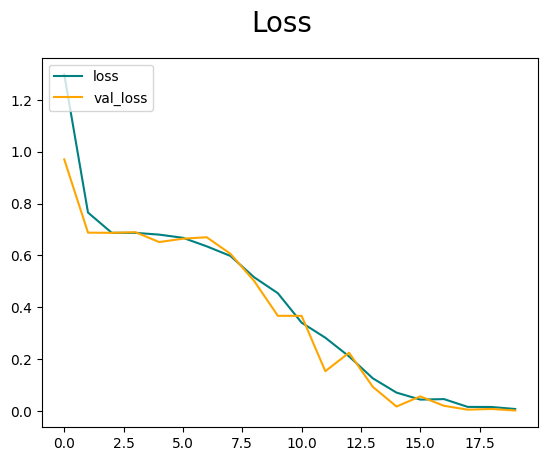

In [180]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

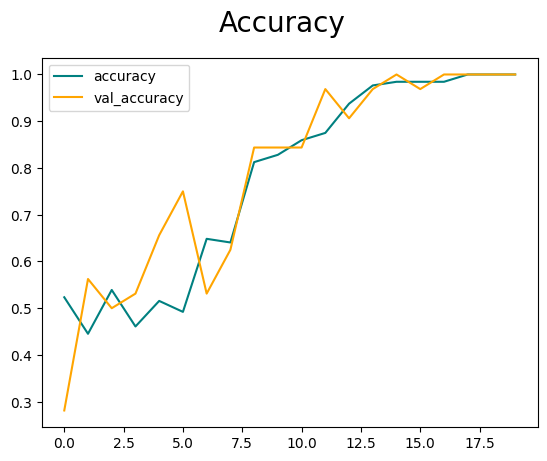

In [181]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [182]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [183]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [184]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [185]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


# 10. Test

In [266]:
import cv2

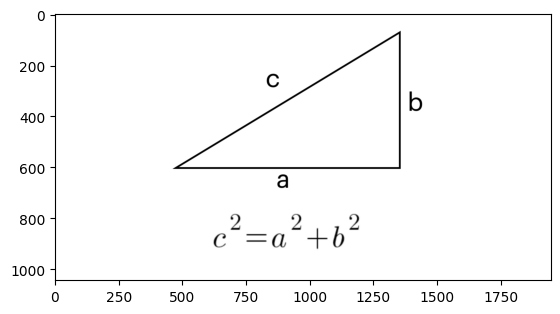

In [278]:
img = cv2.imread('pytha.png')
plt.imshow(img)
plt.show()

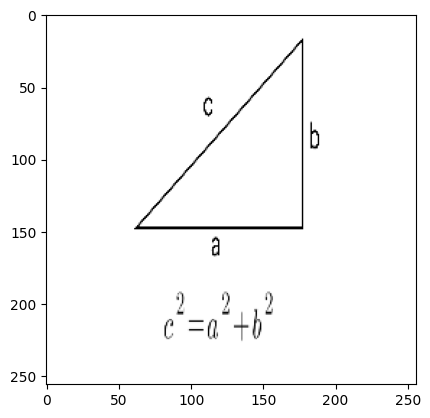

In [279]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [280]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 24ms/step


In [281]:
yhat

array([[6.2041937e-07]], dtype=float32)

In [282]:
if yhat > 7.000000e-07 :
    print(f'Predicted formula is Algebra')
elif yhat > 6.0000000e-07:
    print(f'Predicted formula is Pythagoras')
else :
  print("Rumus tidak teridentifikasi")

Predicted formula is Pythagoras


# 11. Save the Model

In [99]:
from tensorflow.keras.models import load_model

In [100]:
model.save(os.path.join('models','formulaclass.h5'))

In [104]:
new_model = load_model('formulaclass.h5')

OSError: No file or directory found at formulaclass.h5

In [103]:
new_model.predict(np.expand_dims(resize/255, 0))

NameError: name 'new_model' is not defined

##Get Data

In [50]:
pip install bing-image-downloader

In [155]:
from bing_image_downloader import downloader

query_string = "algebra formula"
folder = 'asset'

downloader.download(query_string, limit=100,  output_dir=folder, adult_filter_off=True, force_replace=False, timeout=60, verbose=True)

[%] Downloading Images to /content/asset/algebra formula


[!!]Indexing page: 1

[%] Indexed 35 Images on Page 1.


[%] Downloading Image #1 from https://d1whtlypfis84e.cloudfront.net/guides/wp-content/uploads/2019/11/08065609/a5a8795368be161444b69827196b6168.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://i.ytimg.com/vi/wTaFc0s1-BM/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://d1whtlypfis84e.cloudfront.net/guides/wp-content/uploads/2019/11/13101235/Introduction-to-Algebra-v2-725x1024.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://i.pinimg.com/736x/2a/b5/80/2ab5806197f02b8d2d12a42657b6504f.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://d77da31580fbc8944c00-52b01ccbcfe56047120eec75d9cb2cbd.ssl.cf6.rackcdn.com/ec107bf7-9462-4685-aeaa-bd3889a9abed/formulas-involving-square---algebra-formulas---teachoo.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://preview.redd.it/myb2p20pb0b51.jpg?auto=